# <center>Проведение А/В-теста для проверки гипотезы для увеличения выручки  интернет-магазина</center>

# <center>Описание проекта</center>
Для увеличения выручки интернет-магазина отделами аналитики и маркетинга был выдвинут список гипотез, который необходимо приоритизировать. В соответствии с приоритизацией будет выбрана гипотеза для проведения А/В-теста, результаты которого будут проанализированы.

Проект состоит из двух частей:
1. Приоритизация гипотез
2. Анализ A/B-теста

## Приоритизация гипотез

Данная часть включает следующие задачи:
* Применение фреймворка ICE для приоритизации гипотез
* Применение фреймворк RICE для приоритизации гипотез
* Причина изменения приоритизации гипотез при применении RICE вместо ICE

In [1]:
# подключения библиотек
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from pandas.plotting import register_matplotlib_converters

In [2]:
register_matplotlib_converters()

In [3]:
# загрузка данных
try:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
except:
    hypothesis = pd.read_csv('hypothesis.csv')

In [4]:
pd.set_option("max_colwidth", 110)

In [5]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [6]:
#список гипотез
for i in range(0, 9):
    print(i+1, hypothesis.iloc[i, 0])

1 Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
2 Запустить собственную службу доставки, что сократит срок доставки заказов
3 Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
4 Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар
5 Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей
6 Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов
7 Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
8 Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
9 Запустить акцию, дающую скидку на товар в день рождения


### Применение фреймворка ICE для приоритизации гипотез

In [7]:
ice = (
    (hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts'])
    .sort_values(ascending=False).reset_index().round(1)
)
ice.columns = ['№ hypothesis', 'rating']
ice['№ hypothesis'] = ice['№ hypothesis']+1
print('Приоритезация гипотез методом ICE')
ice

Приоритезация гипотез методом ICE


,№ hypothesis,rating
0,9,16.2
1,1,13.3
2,8,11.2
3,7,8.0
4,3,7.0
5,2,2.0
6,6,1.3
7,4,1.1
8,5,1.0


Гипотеза №9 оказалась самой приоритетной согласно фреймворку ICE.

*Гипотеза №9: Запустить акцию, дающую скидку на товар в день рождения*

### Применение фреймворка RICE для приоритизации гипотез

In [8]:
rice = (
    (hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts'])
    .sort_values(ascending=False).reset_index().round(1)
)
rice.columns = ['№ hypothesis', 'rating']
rice['№ hypothesis'] = rice['№ hypothesis']+1
print('Приоритезация гипотез методом RICE')
rice

Приоритезация гипотез методом RICE


,№ hypothesis,rating
0,8,112.0
1,3,56.0
2,7,40.0
3,1,40.0
4,9,16.2
5,4,9.0
6,6,4.0
7,2,4.0
8,5,3.0


Гипотеза №8 оказалась самой приоритетной согласно фреймворку ICE.

*Гипотеза №8: Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок*

### Причина изменения приоритизации гипотез при применении RICE вместо ICE

In [9]:
ice_rice = ice.join(rice, lsuffix='_ice', rsuffix='_rice')[['№ hypothesis_ice', '№ hypothesis_rice']]
ice_rice

,№ hypothesis_ice,№ hypothesis_rice
0,9,8
1,1,3
2,8,7
3,7,1
4,3,9
5,2,4
6,6,6
7,4,2
8,5,5


При применении фреймворка RICE самой приоритетной оказалась гипотеза №8. А гипотеза №9, которая была лидером при применении фреймворка ICE оказалась на пятой строчке.<br>
Это произошло из-за параметра Reach (скольких пользователей затронет вносимое изменение). Гипотеза №9 гласит: *Запустить акцию, дающую скидку на товар в день рождения*. Reach у этой гипотезы равен 1, т.к. он влияет на малое количество пользователей (не все пользователи совершат покупку в день рождения). Reach для гипотезы №8 равен 10, т.к. данное изменение окажет влияние на всех пользователей.

## Анализ A/B-теста

Был проведен А/В-тест и получены результаты. Необходимо проанализировать А/В-тест.

Данная часть включает следующие задачи:
* Построение графика кумулятивной выручки по группам. Сделать выводы и предположения.
* Построение графика кумулятивного среднего чека по группам. Сделать выводы и предположения.
* Построение графика относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.
* Построение графика кумулятивной конверсии по группам. Сделать выводы и предположения.
* Построение графика относительного изменения кумулятивной конверсии группы B к группе A. Сделать выводы и предположения.
* Построение точечного графика количества заказов по пользователям. Сделать выводы и предположения.
* Расчет 95-й и 99-й перцентилей количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.
* Построение точечного графика стоимостей заказов. Сделать выводы и предположения.
* Расчет 95-й и 99-й перцентилей стоимости заказов. Выбрать границу для определения аномальных заказов.
* Расчет статистической значимости различий в конверсии между группами по «сырым» данным. Сделать выводы и предположения.
* Расчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.
* Расчет статистической значимости различий в конверсии между группами по «очищенным» данным. Сделать выводы и предположения.
* Расчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.
* Приняние решения по результатам теста и объяснить его.

In [10]:
# загрузка данных
try:
    orders = pd.read_csv('/datasets/orders.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')
except:
    orders = pd.read_csv('orders.csv')
    visitors = pd.read_csv('visitors.csv')

In [11]:
# напишем функцию для получения общей информации о датасете, наличии дубликатов 
def get_info(df):
    return (display(df.sample(3)),
            df.info(), 
            print(f'Количество дубликатов: {df.duplicated().sum()}'))

In [12]:
# таблица с заказами
get_info(orders)

,transactionId,visitorId,date,revenue,group
854,2865895399,1732269954,2019-08-27,760,A
552,151437276,3908431265,2019-08-06,1510,A
181,1532499979,2617784228,2019-08-23,3468,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
Количество дубликатов: 0


(None, None, None)

Столбцы таблицы *orders*
* `transactionId` — идентификатор заказа;
* `visitorId` — идентификатор пользователя, совершившего заказ;
* `date` — дата, когда был совершён заказ;
* `revenue` — выручка заказа;
* `group` — группа A/B-теста, в которую попал заказ.

In [13]:
# таблица с количеством поситителей
get_info(visitors)

,date,group,visitors
46,2019-08-16,B,413
50,2019-08-20,B,560
23,2019-08-24,A,395


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
Количество дубликатов: 0


(None, None, None)

Столбцы таблицы *visitors*
* `date` — дата;
* `group` — группа A/B-теста;
* `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста

В обеих таблицах нужно поменять тип данных столбца `date` на временной тип.

In [14]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
print(orders['date'].dtype)
print(visitors['date'].dtype)

datetime64[ns]
datetime64[ns]


Проверим есть ли одни и те же пользователи в разных группах

In [15]:
inter = np.intersect1d(orders.query('group == "A"')['visitorId'].unique(), orders.query('group == "B"')['visitorId'].unique())
print(f'Количество пользователей, которые находятся в обеих группах: {len(inter)}')

Количество пользователей, которые находятся в обеих группах: 58


Удалим их, чтобы эти данные не искажали анализ.

In [16]:
orders = orders[~orders['visitorId'].isin(inter)]

Данные готовы к анализу.

### Построение графика кумулятивной выручки по группам. Сделать выводы и предположения.

In [17]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates() 
datesGroups.sample(2)

,date,group
581,2019-08-07,B
493,2019-08-26,A


In [18]:
# cоберём агрегированные кумулятивные по дням данные о заказах
ordersAggregated = (
    datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
                      .agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 
                            'visitorId' : 'nunique', 'revenue' : 'sum'}), 
                      axis=1)
    .sort_values(by=['date','group'])
)

ordersAggregated.head()

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854


In [19]:
# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = (
    datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
                      .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), 
                      axis=1)
    .sort_values(by=['date','group'])
)
visitorsAggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [20]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData.head(5) 

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


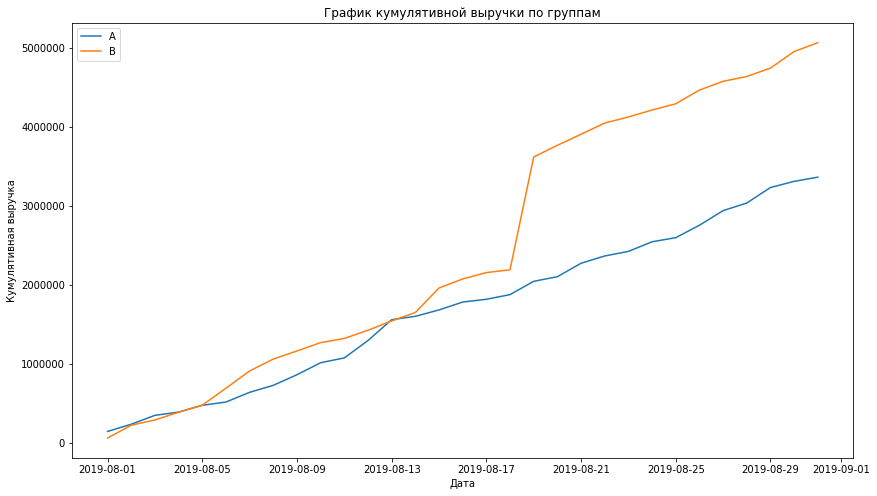

In [21]:
plt.figure(figsize=(14, 8))
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('График кумулятивной выручки по группам')
plt.xlabel("Дата")
plt.ylabel("Кумулятивная выручка")
plt.legend() 
plt.show()

**Выводы и предположения**

* Выручка увеличивается в течение всего теста
* График выручки группы В имеет точку с резким ростом -  возможен всплеск числа заказов, либо появление очень дорогих заказов в выборке

### Построение графика кумулятивного среднего чека по группам. Сделать выводы и предположения.

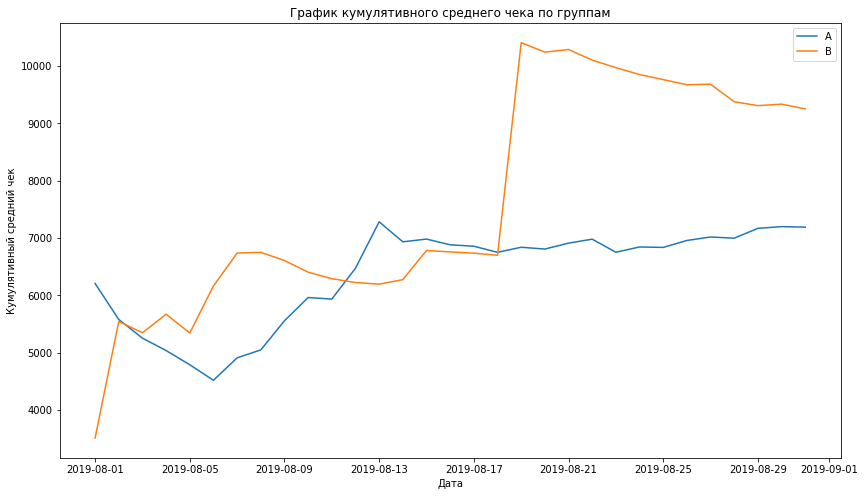

In [22]:
plt.figure(figsize=(14, 8))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend() 
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel("Дата")
plt.ylabel("Кумулятивный средний чек")
plt.show()

**Выводы и предположения**
* Средний чек тоже становится равномерным ближе к концу теста: растет для группы A и продолжает падать для группы B. Возможно, в группу B в середине теста попали крупные заказы (резкий всплеск на графике). Тогда ей нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.

### Построение графика относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.

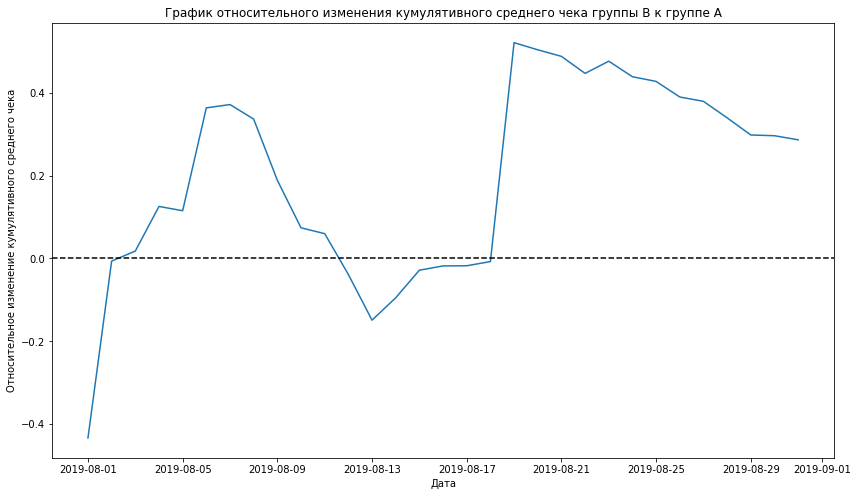

In [23]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = (
    cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
)
plt.figure(figsize=(14, 8))
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], 
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel("Дата")
plt.ylabel("Относительное изменение кумулятивного среднего чека")
plt.show()

**Выводы и предположения**
* В нескольких точках график различия между сегментами резко меняется. Скорее всего присутствуют выбросы.
* После последнего всплеска преимущество группы В снижается.

### Построение графика кумулятивной конверсии по группам. Сделать выводы и предположения.

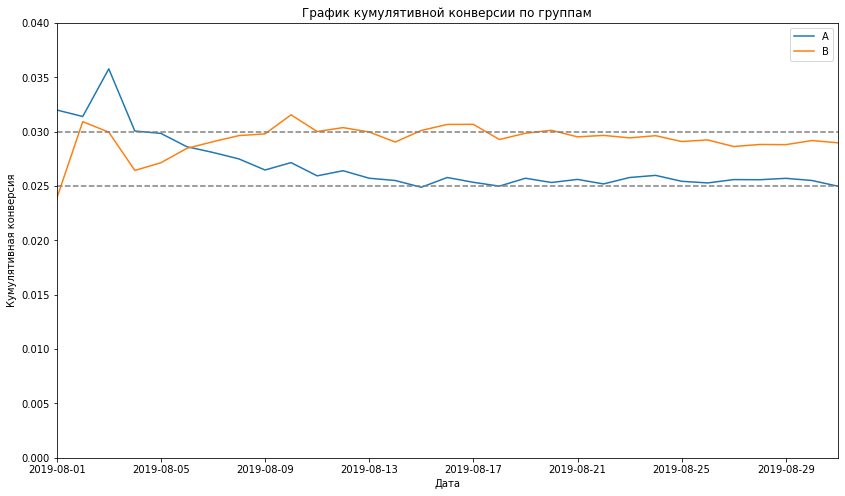

In [24]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(14, 8))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.axhline(y=0.03, color='grey', linestyle='--')
plt.axhline(y=0.025, color='grey', linestyle='--')
# задаем масштаб осей
plt.axis(["2019-08-01", '2019-08-31', 0, 0.04])
plt.title('График кумулятивной конверсии по группам')
plt.xlabel("Дата")
plt.ylabel("Кумулятивная конверсия")
plt.show()

**Выводы и предположения**
* После некоторых колебаний группы зафиксировались. При этом группа В имеет более высокую кумулятивную конверсию.
* Изменения благоприятно сказались на коверсии.

### Построение графика относительного изменения кумулятивной конверсии группы B к группе A. Сделать выводы и предположения.

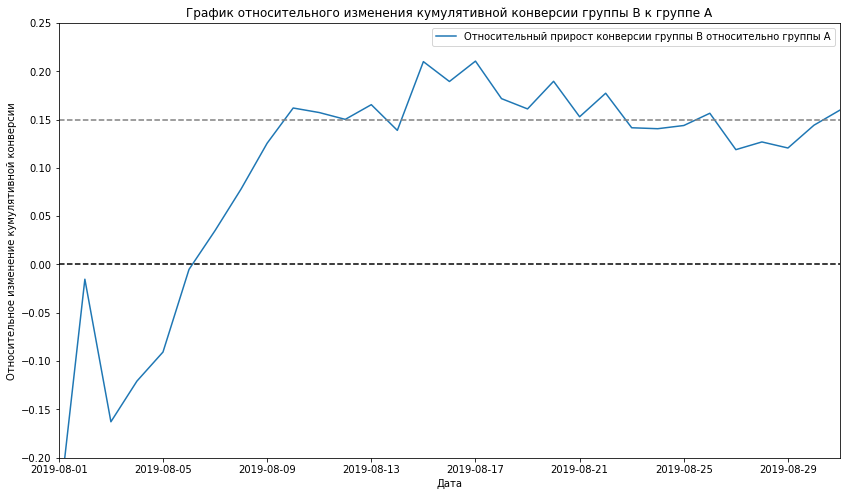

In [25]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(14, 8))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-08-31', -0.20, 0.25])
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.xlabel("Дата")
plt.ylabel("Относительное изменение кумулятивной конверсии")
plt.show()

**Выводы и предположения**
* В начале теста группа B проигрывала группе A, затем вырвалась вперёд. Потом её конверсия снова немного падала, но теперь постепенно растёт.

### Построение точечного графика количества заказов по пользователям. Выводы и предположения.

In [26]:
# количество заказов по пользователям
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

ordersByUsers.columns = ['visitorId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10)) 

      visitorId  orders
908  3967698036       3
55    249864742       3
478  2108163459       3
687  2988190573       3
890  3908431265       3
138   611059232       3
632  2742574263       3
157   678354126       2
323  1404560065       2
452  1985475298       2


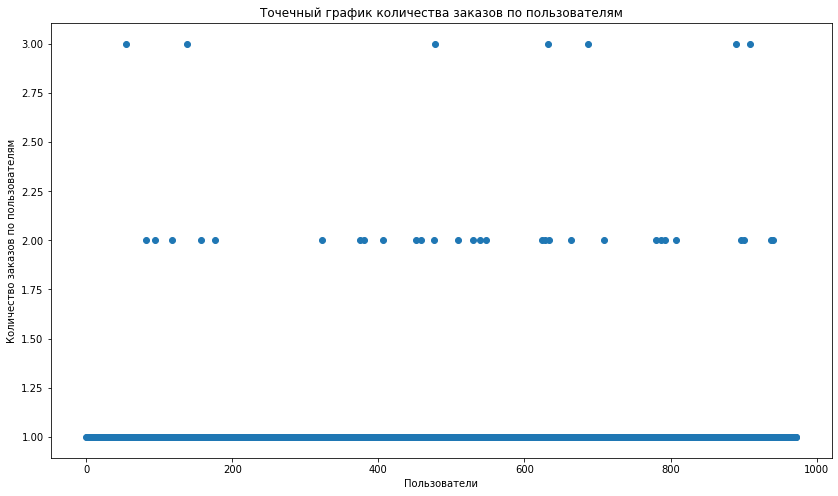

In [27]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.figure(figsize=(14, 8))
plt.scatter(x_values, ordersByUsers['orders']) 
plt.title('Точечный график количества заказов по пользователям')
plt.xlabel("Пользователи")
plt.ylabel("Количество заказов по пользователям")
plt.show()

**Выводы и предположения**
* Есть пользователи с 2-3 заказами. Их точная доля не ясна.

### Расчет 95-й и 99-й перцентилей количества заказов на пользователя. Выбор границы для определения аномальных пользователей.

In [28]:
print(f'95-й процентиль количества заказов: {np.percentile(ordersByUsers["orders"], [95])}')
print(f'99-й процентиль количества заказов: {np.percentile(ordersByUsers["orders"], [99])}')

95-й процентиль количества заказов: [1.]
99-й процентиль количества заказов: [2.]


**Выводы**

* Не более 5% пользователей оформляли больше чем 1 заказов. И 1% пользователей заказывали более 2 заказов.
* Выбираем **1 заказ** на пользователя как границу для определения выбросов.

### Построение точечного графика стоимостей заказов. Выводы и предположения.

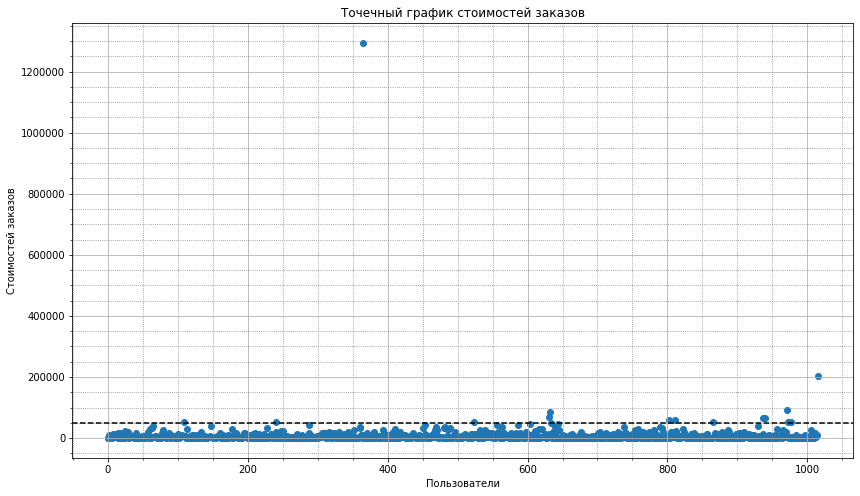

In [29]:
x_values = pd.Series(range(0,len(orders['revenue'])))

plt.figure(figsize=(14, 8))
plt.scatter(x_values, orders['revenue'])
plt.axhline(y=50000, 
            color='black', 
            linestyle='--')
plt.minorticks_on()
plt.grid(which='minor',
        color = 'gray',
        linestyle = ':')
plt.grid(True)
plt.title('Точечный график стоимостей заказов')
plt.xlabel("Пользователи")
plt.ylabel("Стоимостей заказов")
plt.show()

**Выводы и предположения**
* Подавляющее большинство заказов стоимостью не более 50000.
* Есть один заказ примерно на 200000 и один примерно на 1300000. Эти выбросы могут исказить результат теста.

### Расчет 95-й и 99-й перцентилей стоимости заказов. Выбор границы для определения аномальных заказов.

In [30]:
print(f'95-й процентиль стоимости заказов: {np.percentile(orders["revenue"], [95])}')
print(f'99-й процентиль стоимости заказов: {np.percentile(orders["revenue"], [99])}')

95-й процентиль стоимости заказов: [26785.]
99-й процентиль стоимости заказов: [53904.]


**Выводы**
* Менее 5% заказов стоимостью более 26785. И 1% заказов стоимостью более 53904.
* Выбираем **26785** как границу для определения аномальных заказов.

### Расчет статистической значимости различий в конверсии между группами по «сырым» данным. Выводы и предположения.

In [31]:
# количество поситителей по дням в группе А
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

# кумулятивное количество поситителей в группе А
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

# количество поситителей по дням в группе В
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

# кумулятивное количество поситителей в группе В
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

# количество и сумма заказов по дням в группе А
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

# кумулятивное количество и сумма заказов по дням в группе А
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

# количество и сумма заказов по дням в группе В
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

# кумулятивное количество и сумма заказов по дням в группе В
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

# объединение полученных таблиц в одну
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5))

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              23           142779              17   
1 2019-08-02              19            91602              23   
2 2019-08-03              24           112473              14   
3 2019-08-04              11            41176              14   
4 2019-08-05              22            86383              21   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0            59758                  23               142779   
1           162043                  42               234381   
2            67049                  66               346854   
3            96890                  77               388030   
4            89908                  99               474413   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  17                59758               719   
1                  40               221801               619   
2                  54               28

Названия столбцов данных:
* `date` — дата;
* `ordersPerDateA` — количество заказов в выбранную дату в группе A;
* `revenuePerDateA` — суммарная выручка в выбранную дату в группе A;
* `ordersPerDateB` — количество заказов в выбранную дату в группе B;
* `revenuePerDateB` — суммарная выручка в выбранную дату в группе B;
* `ordersCummulativeA` — суммарное число заказов до выбранной даты включительно в группе A;
* `revenueCummulativeA` — суммарная выручка до выбранной даты включительно в группе A;
* `ordersCummulativeB` — суммарное количество заказов до выбранной даты включительно в группе B;
* `revenueCummulativeB` — суммарная выручка до выбранной даты включительно в группе B;
* `visitorsPerDateA` — количество пользователей в выбранную дату в группе A;
* `visitorsPerDateB` — количество пользователей в выбранную дату в группе B;
* `visitorsCummulativeA` — количество пользователей до выбранной даты включительно в группе A;
* `visitorsCummulativeB` — количество пользователей до выбранной даты включительно в группе B.

In [32]:
# Создадим переменные, в которых для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

In [33]:
# Объявим переменные, в которых пользователям из разных групп будет соответствовать количество заказов. 
# Тем, кто ничего не заказал, будут соответствовать нули.
sampleA = (
    pd.concat([ordersByUsersA['orders'],
                      pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), 
                                name='orders')], axis=0)
)

sampleB = (
    pd.concat([ordersByUsersB['orders'],
               pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), 
                         name='orders')], axis=0)
)

$H_0$: Нет статистически значимого различия в конверсии  между группами по «сырым» данным.<br>
$H_1$: Есть статистически значимое различие в конверсии  между группами по «сырым» данным.

In [34]:
# проверка критерием Манна-Уитни
results = stats.mannwhitneyu(sampleA, sampleB, alternative="two-sided")

 # критический уровень статистической значимости
alpha = 0.05 

print('p-значение:{0:.3f}'.format(results.pvalue))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    )

p-значение:0.011
Отвергаем нулевую гипотезу: разница статистически значима


In [35]:
# относительное изменение конверсии группы B к группе А
print("Относительное изменение конверсии группы B: {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

Относительное изменение конверсии группы B: 0.160


**Выводы и предположения**
* Между конверсиями групп А и В по "сырым" данным есть статистически значимая разница. 
* Относительная конверсия группы В лучше, чем группы А на 16%.

### Расчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным. Выводы и предположения.

$H_0$: Нет статистически значимого различия по среднему чеку между группами по «сырым» данным.<br>
$H_1$: Есть статистически значимое различие по среднему чеку между группами по «сырым» данным.

In [36]:
results = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'], 
                             alternative="two-sided")

 # критический уровень статистической значимости
alpha = 0.05 

print('p-значение:{0:.3f}'.format(results.pvalue))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    )

p-значение:0.829
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


In [37]:
# относительное изменение среднего чека группы B к группе А
print('Относительное различие среднего чека группы B к группе А: {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

Относительное различие среднего чека группы B к группе А: 0.287


**Выводы и предположения**
* Между среднеми чеками групп А и В по "сырым" данным нет статистически значимой разницы. 
* Средний чек у группы В выше, чем в группе А почти на 29%.

### Расчет статистической значимости различий в конверсии между группами по «очищенным» данным. Выводы и предположения.

За аномальных пользователей были приняты те, кто совершил **больше 1 заказа** или совершил заказ **дороже 26785 рублей**. 

In [38]:
# пользователи с количеством заказов более 2-х
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 1]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 1]['visitorId'],
    ],
    axis=0,
)

# пользователи со стоимостью заказов более 28000
usersWithExpensiveOrders = orders[orders['revenue'] > 26785]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

print(f'Количество аномальных пользователей: {abnormalUsers.shape}')

Количество аномальных пользователей: (86,)


In [39]:
# Объявим переменные по «очищенным» данным, в которых пользователям из разных групп будет соответствовать количество заказов. 
# Тем, кто ничего не заказал, будут соответствовать нули.
sampleAFiltered = (
    pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'], 
               pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),
                         name='orders',),],axis=0,)
)

sampleBFiltered = (
    pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'], 
               pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),
                         name='orders',),],axis=0,)
)

$H_0$: Нет статистически значимого различия в конверсии  между группами по «очищенным» данным.<br>
$H_1$: Есть статистически значимое различие в конверсии  между группами по«очищенным» данным.

In [40]:
# проверка критерием Манна-Уитни
results = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative="two-sided")

 # критический уровень статистической значимости
alpha = 0.05 

print('p-значение:{0:.3f}'.format(results.pvalue))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    )

p-значение:0.016
Отвергаем нулевую гипотезу: разница статистически значима


In [41]:
# относительное изменение конверсии группы B к группе А
print("Относительное изменение конверсии группы B: {0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

Относительное изменение конверсии группы B: 0.174


**Выводы и предположения**
* Между конверсиями групп А и В по "очищенным" данным есть статистически значимая разница. 
* Относительная конверсия группы В лучше, чем группы А на 17%.

### Расчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным. Выводы.

$H_0$: Нет статистически значимого различия в среднем чеке  между группами по «очищенным» данным.<br>
$H_1$: Есть статистически значимое различиев среднем чеке  между группами по«очищенным» данным.

In [42]:
results = stats.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A', 
                                                   np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'], 
                             orders[np.logical_and(orders['group'] == 'B', 
                                                   np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'], 
                             alternative="two-sided")

# критический уровень статистической значимости
alpha = 0.05 

print('p-значение:{0:.3f}'.format(results.pvalue))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    )


p-значение:0.727
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


In [43]:
# относительное изменение конверсии группы B к группе А по "очищенным" данным
print(
    "Относительное изменение среднего чека группы B по 'очищенным данным': {0:.3f}"
    .format(
        (
            orders[np.logical_and
                   (orders['group'] == 'B', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() / 
            orders[np.logical_and
                   (orders['group'] == 'A', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()- 1 
        )
    )
)

Относительное изменение среднего чека группы B по 'очищенным данным': -0.034


**Выводы и предположения**
* Между среднеми чеками групп А и В по "очищенным" данным нет статистически значимой разницы. 
* При этом средний чек у группы В ниже среднего чека группы А на 3%.

### Принятие решения по результатам теста

* График различия среднего чека позволил найти аномалии (слишком высокая стоимость заказа и слишком болшое количество заказов на пользователя), которые влияли на тест. Но при подсчете статистической значимости различий в **среднем чеке** заказа между группами ни по «сырым», ни по данным после фильтрации аномалий **различий нет**. Значит можно сказать, что средний чек не изменился.
* **Есть статистически значимое различие** по **конверсии** между группами и по «сырым», и по данным после фильтрации аномалий. При этом группа В заметно лидирует по этому показателю (16% по "сырым", 17% по "очищенным" данным). Об этом также говорит график различия конверсии между группами.<br>

В итоге по полученным результатам и по графику кумулятивной выручки по группам можно судить о том, что группа **В имеет лучшую выручку**.
***
Таким образом можно остановить тест и признать его успешным, зафиксировав победу **группы В**.
